✅ Data preprocessing completed.
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0     

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Model Evaluation:
Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Accuracy: 0.7945984363894811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.8391464039633277
✅ Model saved to churn_model.pkl
✅ Model loaded successfully!


 99%|===================| 1389/1407 [00:26<00:00]        

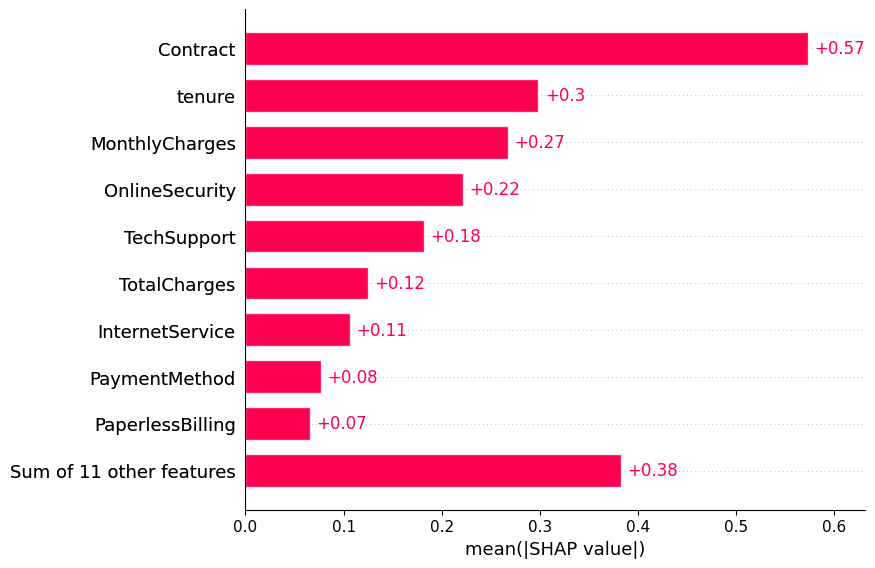

In [ ]:
# 03_model_training_and_shap.ipynb

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleaned_telco.csv')

# Features and label
X = df.drop(columns=['Churn'])
y = df['Churn']

# Encoding
from utils.preprocessing import encode_categoricals
X, _ = encode_categoricals(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Accuracy: 0.7945984363894811

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC Score: 0.8391464039633277
